In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Kalimantan Barat.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       355 non-null    float64       
 2   Tx       356 non-null    float64       
 3   Tavg     363 non-null    float64       
 4   RH_avg   363 non-null    float64       
 5   RR       311 non-null    float64       
 6   ss       361 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    364 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-b9bdf07ec4ba>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.6,32.5,0.0,26.7
1,2023-02-01,24.5,30.8,NaN,26.9
2,2023-03-01,25.0,30.2,0.0,27.0
3,2023-04-01,23.9,29.8,8888.0,25.5
4,2023-05-01,23.8,30.0,35.2,26.4
...,...,...,...,...,...
360,2023-12-16,24.9,32.4,0.0,30.7
361,2023-12-17,25.6,32.8,0.0,30.7
362,2023-12-18,25.0,32.6,NaN,30.4
363,2023-12-19,25.2,30.6,1.2,28.5


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.6,32.5,0.0,26.7
1,31,31,2023-01-02,23.9,30.0,11.9,25.9
2,59,60,2023-01-03,24.1,28.6,5.3,25.6
3,90,92,2023-01-04,23.2,30.4,4.5,26.6
4,120,123,2023-01-05,25.2,32.4,0.0,28.8
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,24.9,32.4,0.0,30.7
350,350,361,2023-12-17,25.6,32.8,0.0,30.7
351,351,362,2023-12-18,25.0,32.6,NaN,30.4
352,352,363,2023-12-19,25.2,30.6,1.2,28.5


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         10
Tx          9
RR         54
Tavg        2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       2
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

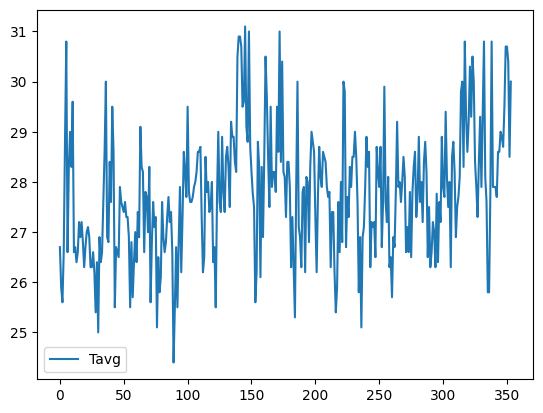

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

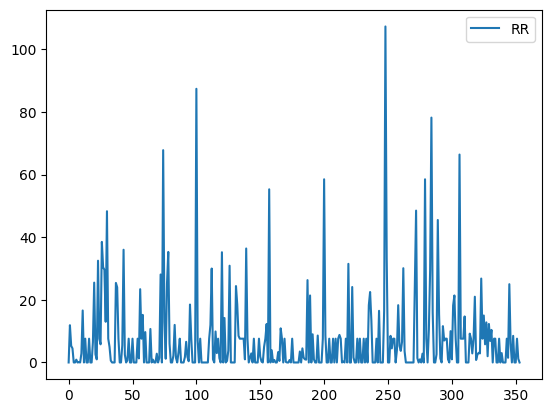

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.6,32.5,0.000000,26.7,30.0,25.9,11.900000
1,31,31,2023-01-02,23.9,30.0,11.900000,25.9,28.6,25.6,5.300000
2,59,60,2023-01-03,24.1,28.6,5.300000,25.6,30.4,26.6,4.500000
3,90,92,2023-01-04,23.2,30.4,4.500000,26.6,32.4,28.8,0.000000
4,120,123,2023-01-05,25.2,32.4,0.000000,28.8,33.8,30.8,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,24.9,32.4,0.000000,30.7,32.8,30.7,0.000000
350,350,361,2023-12-17,25.6,32.8,0.000000,30.7,32.6,30.4,7.600667
351,351,362,2023-12-18,25.0,32.6,7.600667,30.4,30.6,28.5,1.200000
352,352,363,2023-12-19,25.2,30.6,1.200000,28.5,31.8,30.0,0.000000


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.000000,26.7,25.9,11.900000
1,11.900000,25.9,25.6,5.300000
2,5.300000,25.6,26.6,4.500000
3,4.500000,26.6,28.8,0.000000
4,0.000000,28.8,30.8,0.000000
...,...,...,...,...
349,0.000000,30.7,30.7,0.000000
350,0.000000,30.7,30.4,7.600667
351,7.600667,30.4,28.5,1.200000
352,1.200000,28.5,30.0,0.000000


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.000000,26.7,25.9,11.900000
1,11.900000,25.9,25.6,5.300000
2,5.300000,25.6,26.6,4.500000
3,4.500000,26.6,28.8,0.000000
4,0.000000,28.8,30.8,0.000000
...,...,...,...,...
348,8.500000,29.5,30.7,0.000000
349,0.000000,30.7,30.7,0.000000
350,0.000000,30.7,30.4,7.600667
351,7.600667,30.4,28.5,1.200000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.000000,26.7,25.9,11.900000,0
1,11.900000,25.9,25.6,5.300000,1
2,5.300000,25.6,26.6,4.500000,2
3,4.500000,26.6,28.8,0.000000,3
4,0.000000,28.8,30.8,0.000000,4
...,...,...,...,...,...
348,8.500000,29.5,30.7,0.000000,348
349,0.000000,30.7,30.7,0.000000,349
350,0.000000,30.7,30.4,7.600667,350
351,7.600667,30.4,28.5,1.200000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,27.6
283,283,28.0
284,284,27.2
285,285,28.4
286,286,28.8
...,...,...
348,348,29.5
349,349,30.7
350,350,30.7
351,351,30.4


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.80012394, 27.99246057, 27.61174786, 28.18611738, 28.37845401,
       28.09324952, 27.28274981, 27.76161111, 27.18988195, 27.33446447,
       27.62230932, 27.52812128, 27.19516268, 27.89651472, 27.24555716,
       27.81992668, 27.63023041, 28.44337049, 27.96714956, 27.87296152,
       28.68610159, 28.06661833, 27.78141384, 28.02150458, 27.21100487,
       28.2629155 , 28.40749802, 28.12229353, 27.50281027, 27.79065512,
       27.88748352, 28.07982015, 28.89296023, 28.98978863, 28.17928892,
       29.37446189, 28.6594704 , 28.3265118 , 28.61435665, 29.14097206,
       28.66475113, 29.23912065, 29.00167027, 28.23892468, 28.0014743 ,
       27.71626981, 28.24288522, 28.67399241, 28.00675503, 28.72438688,
       29.39426463, 28.1062238 , 27.86877343, 27.0105196 , 27.01183979,
       27.9682422 , 29.40218572, 28.01863667, 28.01995685, 28.02127704,
       27.927089  , 28.35819618, 28.35951636, 28.55185299, 28.50541906,
       28.41123102, 28.7945841 , 29.36895361, 29.3702738 , 29.22

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.8669829196879671 1.163084984713152


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,27.6
283,283,28.0
284,284,27.2
285,285,28.4
286,286,28.8
...,...,...
348,348,29.5
349,349,30.7
350,350,30.7
351,351,30.4


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.800124
283,27.992461
284,27.611748
285,28.186117
286,28.378454
...,...
348,28.794584
349,29.368954
350,29.370274


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.7,NaN
1,25.9,NaN
2,25.6,NaN
3,26.6,NaN
4,28.8,NaN
...,...,...
348,29.5,28.794584
349,30.7,29.368954
350,30.7,29.370274
351,30.4,29.228332


<Axes: >

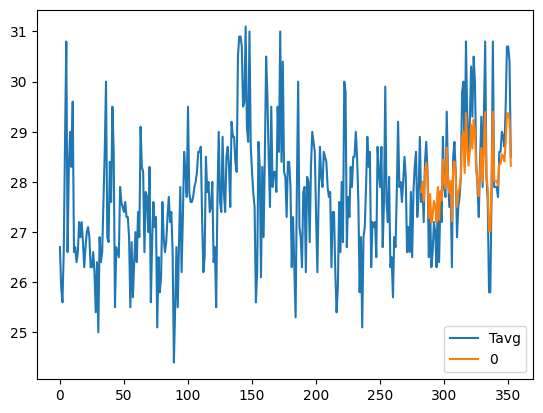

In [27]:
kan.plot()

In [28]:
new_data = [[354,28.5],[355,28.5],[356,28.5],[357,28.5],[358,28.5],[359,28.5],[360,28.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.32496408, 28.32628426, 28.32760444, 28.32892462, 28.33024481,
       28.33156499, 28.33288517])

In [29]:
kan.to_json('Prediksi Kalimantan Barat.json')